
#Inteligencia Artificial y Aplicaciones

## Semestre 2025-1

## Licenciatura en Tecnología
___

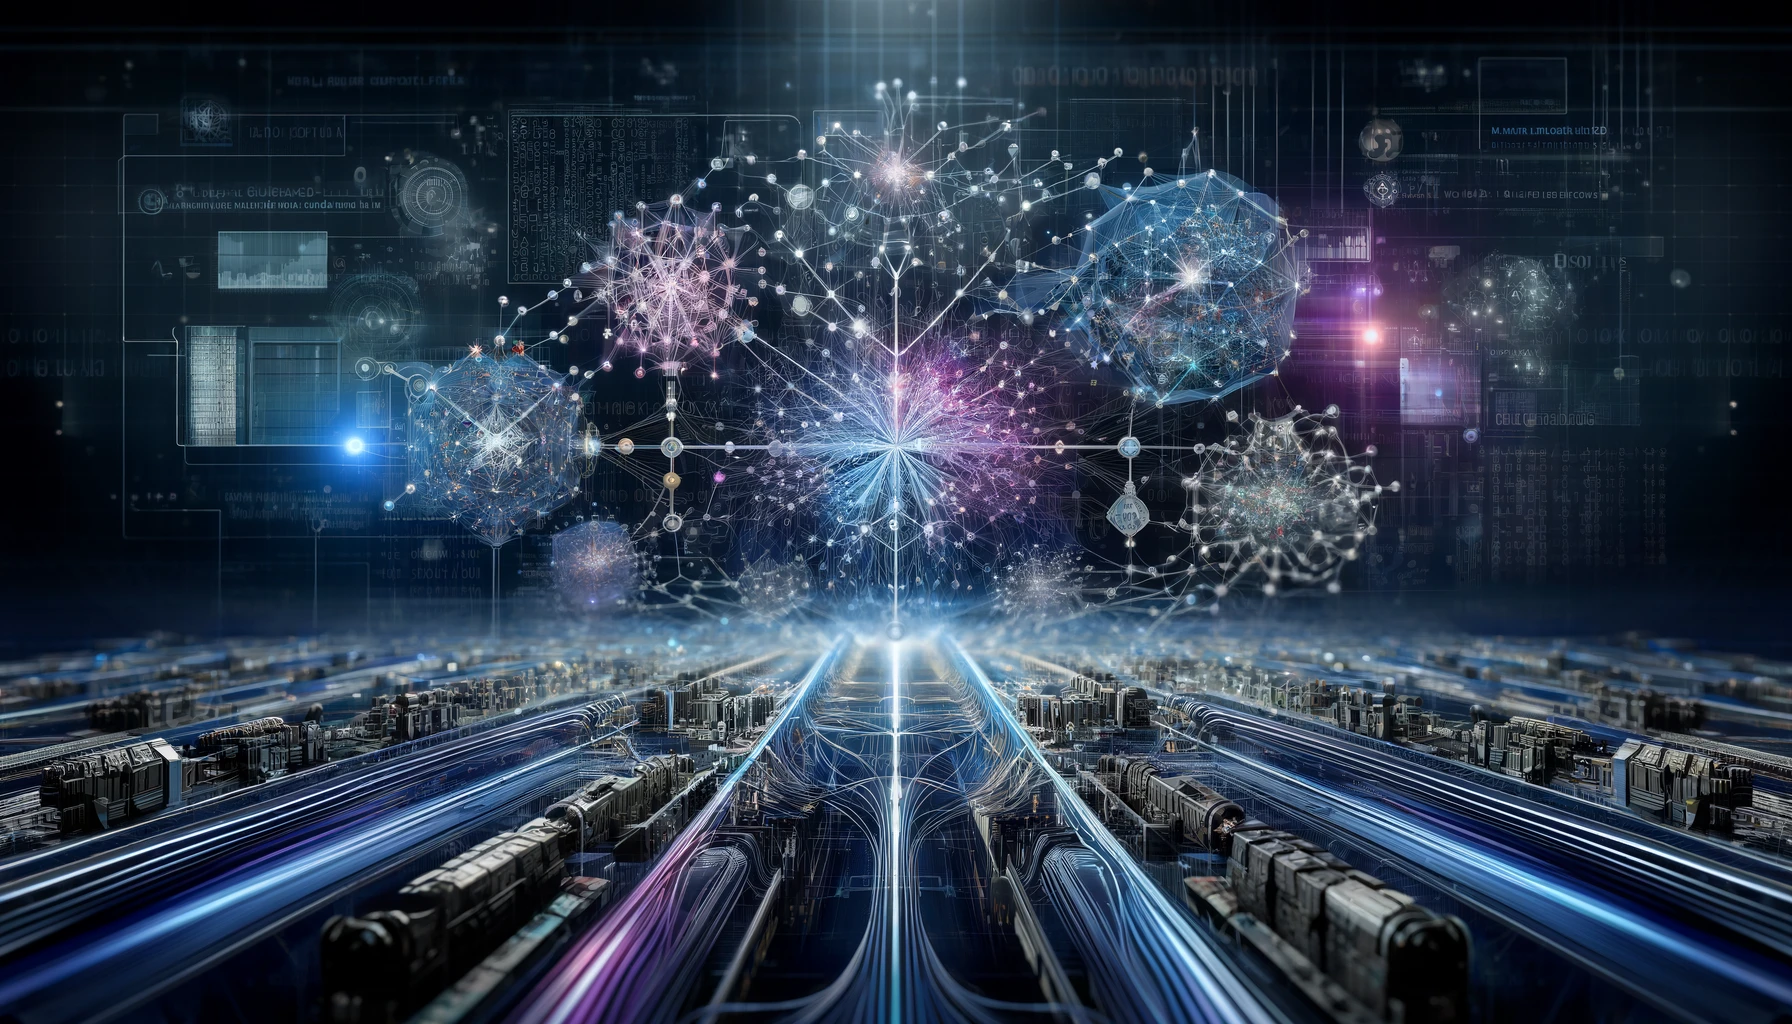

___
### Aprendizaje Profundo

#### Autor: Ulises Olivares
#### uolivares@unam.mx


# Modelo de Perceptrón Simple
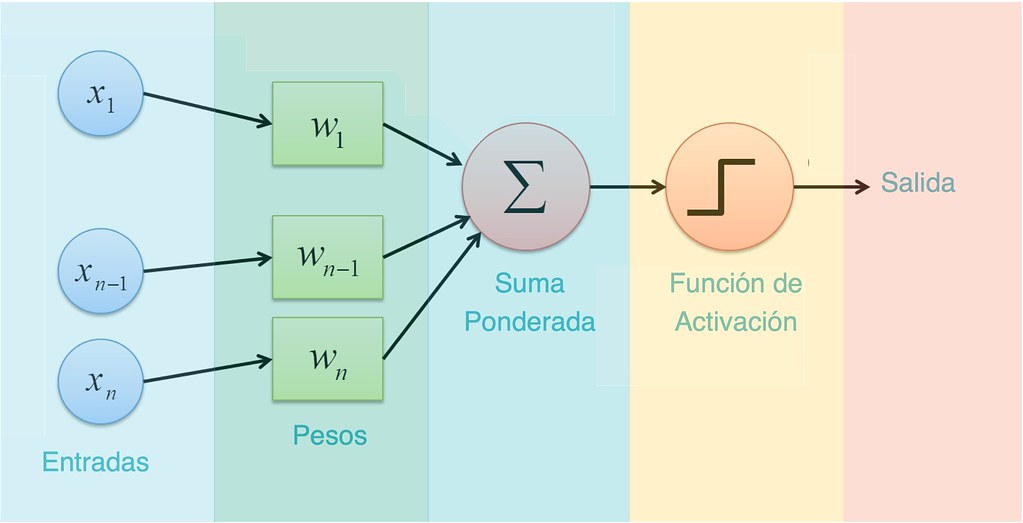

In [ ]:
import tensorflow as tf
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Sesgo
w0 = 1.5

# Esp, mat, fis, quim
X = np.array([8, -8, 9, 6])
W = np.array([0, 0.5, 0, 0])

z = w0 + (np.dot(X, W))

print(z)
print(sigmoid(z))

print(tf.sigmoid(z))

-2.5
0.07585818002124355
tf.Tensor(0.07585818002124355, shape=(), dtype=float64)


# 1. Clasificación de características empleando un perceptrón simple
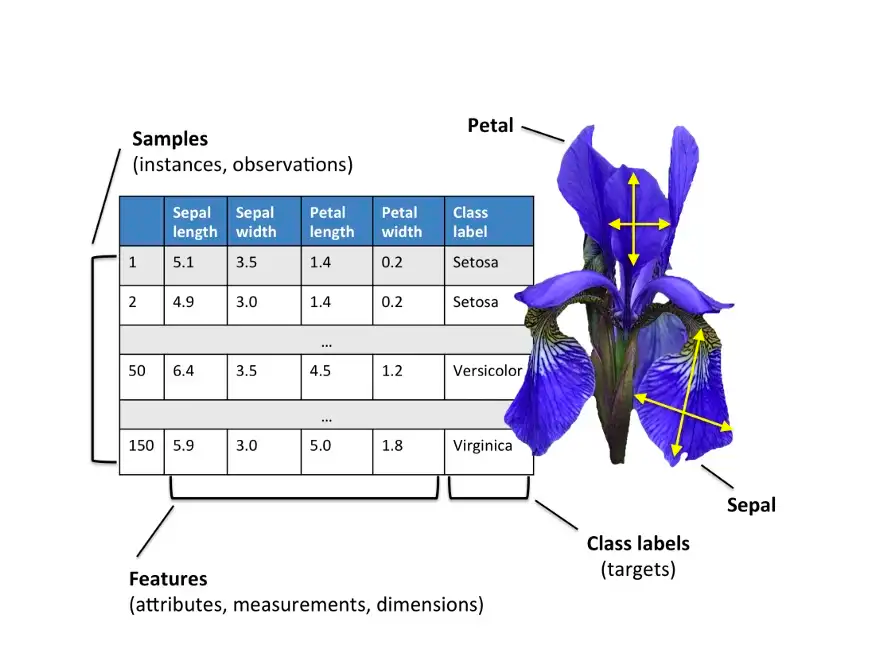


## 1. Importar librerías

In [ ]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2. Cargar y preparar datos

In [ ]:
# Cargar el conjunto de datos
iris = datasets.load_iris()


X = iris.data
print(iris.target)
y = (iris.target != 0) * 1  # Convertir a clasificación binaria: 0 para Setosa, 1 para no-Setosa
print(y)

print(X)
#print(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convertir etiquetas a formato adecuado para TensorFlow/Keras
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(y_train)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.

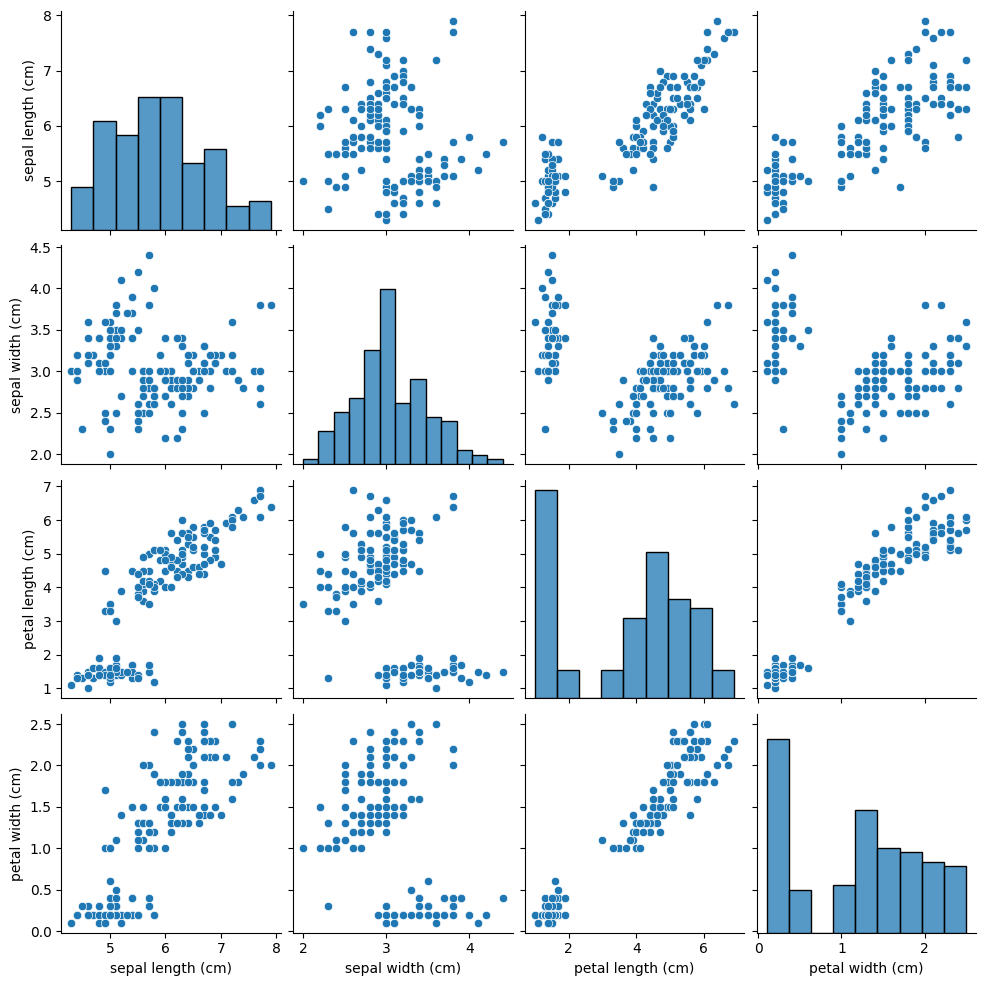

In [ ]:
dfIris = pd.DataFrame(iris.data, columns=iris.feature_names)
sns.pairplot(dfIris)
plt.show()

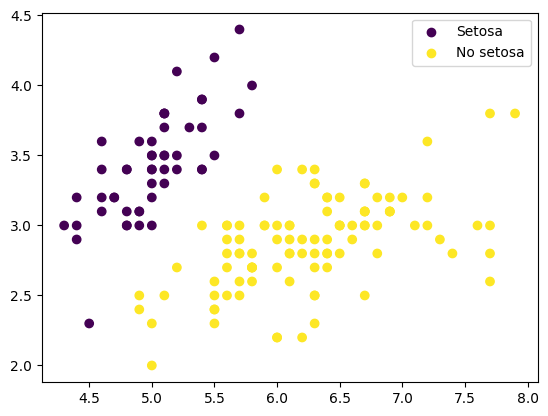

In [ ]:
plt.scatter(X_train[ :, 0], X_train[:, 1], c = y_train, label = 'Setosa')
plt.scatter(X_test[ :, 0], X_test[:, 1], c = y_test, label = 'No setosa')
plt.legend()
plt.show()

## 3. Definir el Modelo de Perceptrón Simple
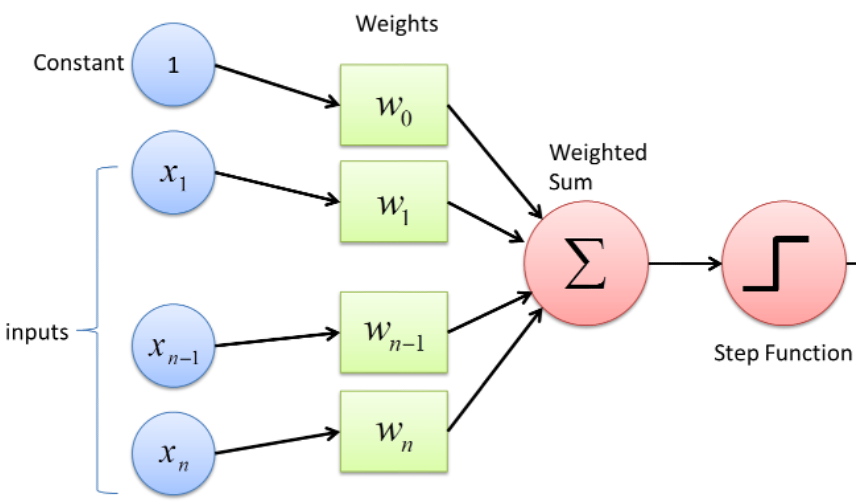

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh', input_shape=(4,)),  # 4 características de entrada
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Compilar el modelo

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 5. Entrenar el Modelo


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7540 - loss: 0.6815 - val_accuracy: 0.6667 - val_loss: 0.6786
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8102 - loss: 0.6720 - val_accuracy: 0.7667 - val_loss: 0.6703
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7358 - loss: 0.6642 - val_accuracy: 0.7000 - val_loss: 0.6625
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7527 - loss: 0.6558 - val_accuracy: 0.6333 - val_loss: 0.6555
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7408 - loss: 0.6505 - val_accuracy: 0.6667 - val_loss: 0.6489
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7008 - loss: 0.6461 - val_accuracy: 0.6667 - val_loss: 0.6430
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6785 - loss: 0.6394 - val_accuracy: 0.6667 - val_loss: 0.6374
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6658 - loss: 0.6342 - val_accuracy: 0.6667 - val_loss: 0.6

## 6. Evaluar el modelo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

Precisión en el conjunto de prueba: 0.73


# 2. Modelos generativos Demo

# Demo de Stable-diffusion

El concepto de "difusión estable" se refiere a la propagación gradual y controlada de un concepto en una población o sistema. Este tipo de red neuronal genera gradualmente la imagen que el usuario solicita a partir de una imagen inicial aleatoria (ruido) la cual va refinando progresivamente para plasmar los conceptos presentes en la descripción textual emitida por el usuario.

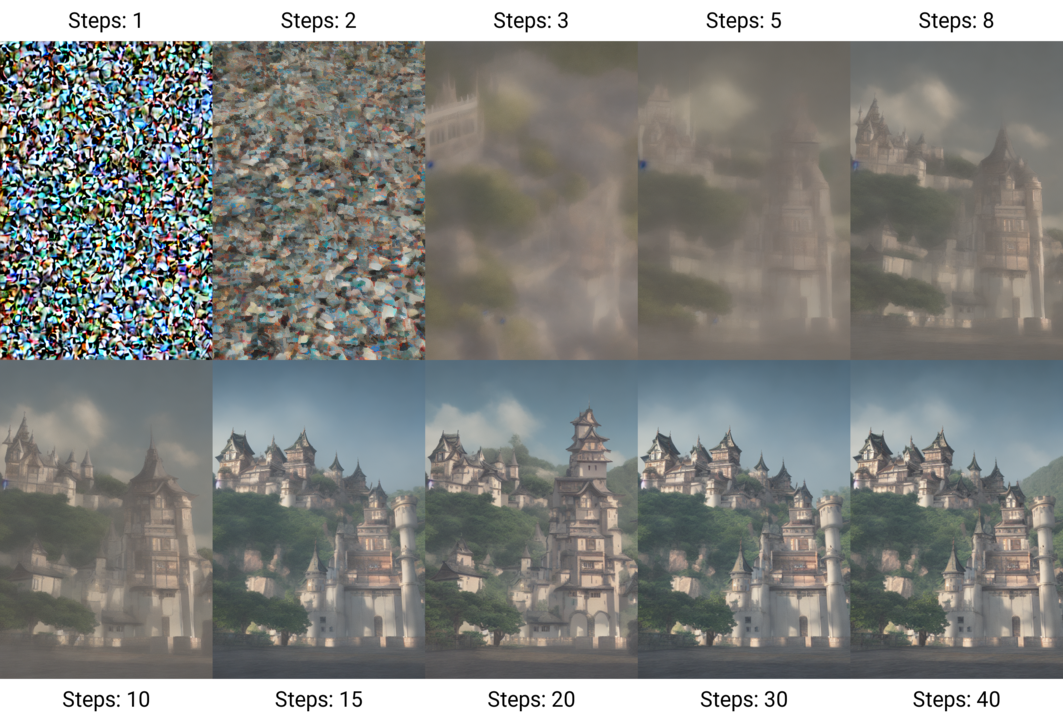
(By Benlisquare - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=124800742)

Este cuaderno nos permite generar imágenes a partir de una descripción textual (prompt), con ayuda del modelo *Stable-diffusion XL Turbo*

---

Basado en el cuaderno [Stable-diffusion-colab (Disponible en GitHub)](https://github.com/woctezuma/stable-diffusion-colab), elaborado por Wok, TonyPepe y Rishabh Moharir.

## Instalamos e importamos las librerías necesarias

In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.7 MB/s eta 0:00:00


In [ ]:
import mediapy as media
import random
import sys
import torch

from diffusers import AutoPipelineForText2Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


## Cargamos el modelo que vamos a usar

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generamos una imagen a partir de una descripción (prompt)

También podemos modificar el número de pasos de inferencia (num_inference_steps, cuántas veces se va a refinar la imagen) y la escala de guía (guidance_scale, qué tanto se apegará al prompt)

  0%|          | 0/3 [00:00<?, ?it/s]


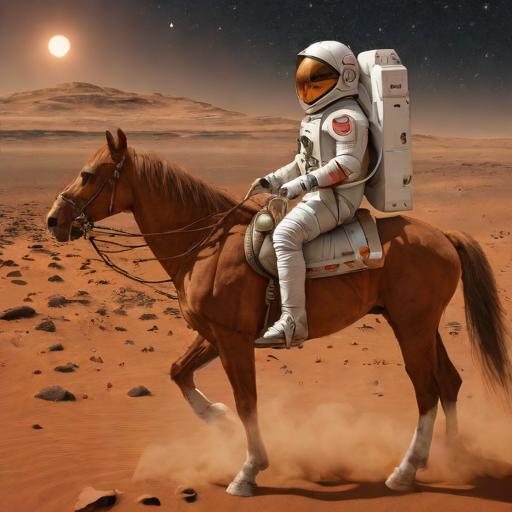

In [ ]:
# @title { run: "auto" }
prompt = "a realistic astronaut in mars riding a horse" # @param {type: "string"}

random_seed = True # @param {type: "boolean"}
if(random_seed):
    seed = random.randint(0, sys.maxsize)
else:
    seed = 0

num_inference_steps = 3 # @param {type:"slider", min:1, max:15, step:1}

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

media.show_images(images)

# 3. Demo de YOLO
YOLO es la abreviación de *You Only Look Once*. Es un modelo de reconocimiento de objetos en tiempo real que puede reconocer varios objetos en una imagen.

Este cuaderno nos permite detectar e identificar los objetos presentes en un video capturado con la webcam, con ayuda del modelo YOLOv8.

---

Basado en el cuaderno [YOLO-V4-Object-Detection (disponible en GitHub)](https://github.com/isnamdnazim/YOLO-V4-Object-Detection/blob/main/Real_time_YOLOv4_Object_Detection_on_Webcam_in_Google_Colab_%7C_Images_and_Video.ipynb), elaborado por Md Nazim Uddin, y en el artículo [Fast object detection implemetation with YOLOv8](https://medium.com/@giulicrenna/fast-object-detection-implemetation-with-yolov8-16b29cb7c2e4), redactado por Giuliano Crenna.

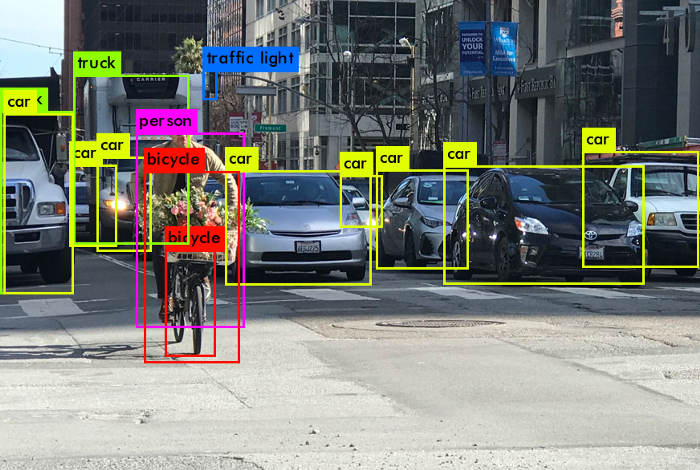

## Instalamos e importamos las librerías necesarias

In [ ]:
%pip install --quiet --upgrade ultralytics supervision==0.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.6/862.6 kB 20.1 MB/s eta 0:00:00


In [ ]:
# Para implementar YOLO
import ultralytics
from ultralytics import YOLO
import torch
import cv2
import supervision as sv
import random

# Para poder usar la webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import io
import PIL

## Definimos algunas funciones que nos van a ayudar a capturar y desplegar el video

In [ ]:
# Función para convertir el objeto JavaScript en una imagen de OpenCV
def js_to_image(js_reply):
    # decode base64 image
    image_bytes = b64decode(js_reply.split(',')[1])
    # convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

# JavaScript para crear correctamente nuestro flujo de video utilizando nuestra webcam como entrada
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

# Función para desplegar la imagen junto con los indicadores de objetos detectados
def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data


# Función para convertir el rectángulo de OpenCV a un string base64 para superponerlo en el video desplegado
def bbox_to_bytes(bbox_array):
    # convertimos el array en una imagen de PIL
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # cambiamos el formato a png
    bbox_PIL.save(iobuf, format='png')
    # establecemos el formato del string retornado
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

## Cargamos el modelo que vamos a usar

In [ ]:
model = YOLO('yolov8n.pt')  # cargamos un modelo pre-entrenado y lo trasladamos a la GPU

if torch.cuda.is_available():
    device: str = "cuda"
    torch.cuda.set_device(0)
    model.to(device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.5MB/s]


## Mostramos en tiempo real los objetos detectados en un video capturado con la webcam


In [ ]:
ultralytics.checks()
class_colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(80)]

# iniciamos el stream de video de la webcam
video_stream()
label_html = 'Capturing...'
# inicializamos el cuadro delimitador vacío
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convertimos la respuesta JS a una imagen de OpenCV
    frame = js_to_image(js_reply["img"])

    # creamos una capa transparente para el cuadro delimitador (bounding box)
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # Obtenemos los resultados de la detección
    results = model.predict(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    # hacemos un bucle a través de las detecciones y las dibujamos en la imagen de la capa transparente
    for bbox, _, confidence, class_id, _ in detections:
        label = model.model.names[class_id]
        left, top, right, bottom = bbox
        left, top, right, bottom = int(left), int(top), int(right), int(bottom)
        bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[class_id], 2)
        bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[class_id], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

    # convertimos la imagen del cuadro delimitador en bytes para poder mostrarlo en el video
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizamos el cuadro delimitador (bbox)
    bbox = bbox_bytes

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.3/78.2 GB disk)


<IPython.core.display.Javascript object>